<a href="https://colab.research.google.com/github/Devam19/Grocery_prediction/blob/main/Dmt_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = 'drive/MyDrive/dataset'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv (Path+'/Groceries_dataset.csv')

In [ ]:
data.shape

(38765, 3)

In [ ]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.sort_values(by=['Date'])

,Member_number,Date,itemDescription
13581,4942,01-01-2014,butter
9557,1922,01-01-2014,tropical fruit
30568,3797,01-01-2014,whole milk
13449,2237,01-01-2014,bottled water
9172,2226,01-01-2014,sausage
...,...,...,...
3049,3122,31-10-2015,chicken
785,1981,31-10-2015,chicken
16087,1787,31-10-2015,chocolate
19198,3122,31-10-2015,bottled beer


In [ ]:
#data_eda = data.copy()
data_eda = pd.read_csv(Path+'/Groceries_dataset.csv',index_col='Date', parse_dates=True)
data_eda.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [ ]:
#Number of unique Costumers and Items
print(data_eda.Member_number.nunique())
print(data_eda.itemDescription.nunique())

3898
167


In [ ]:
#Creating new columns based on the date column
data_eda['year'] = data_eda.index.year
data_eda['month'] = data_eda.index.month
data_eda['day'] = data_eda.index.day
data_eda['weekday'] = data_eda.index.strftime('%A')
data_eda['monthName'] = data_eda.index.strftime('%B')
data_eda.head()

,Member_number,itemDescription,year,month,day,weekday,monthName
Date,,,,,,,
2015-07-21,1808,tropical fruit,2015,7,21,Tuesday,July
2015-05-01,2552,whole milk,2015,5,1,Friday,May
2015-09-19,2300,pip fruit,2015,9,19,Saturday,September
2015-12-12,1187,other vegetables,2015,12,12,Saturday,December
2015-01-02,3037,whole milk,2015,1,2,Friday,January


In [ ]:
data_eda['year'].value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

Text(0.5, 1.0, 'Sales in months')

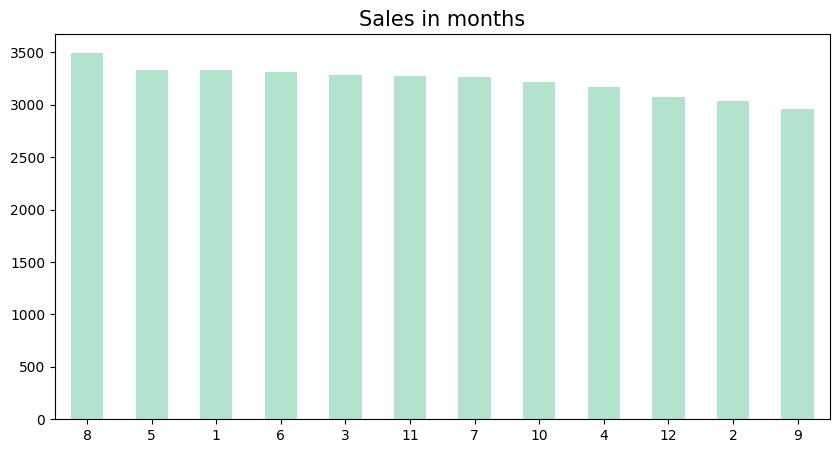

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['month'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in months', size=15)

Text(0.5, 1.0, 'Sales in Weekdays')

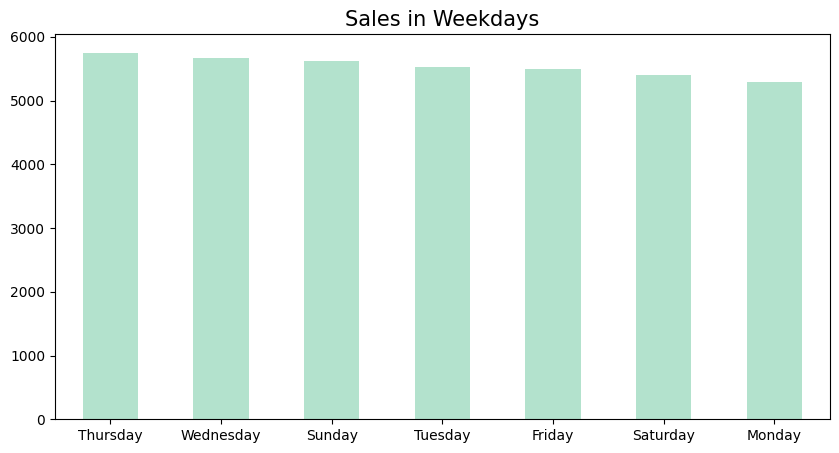

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['weekday'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in Weekdays', size=15)

Text(0.5, 1.0, 'Sales in Days')

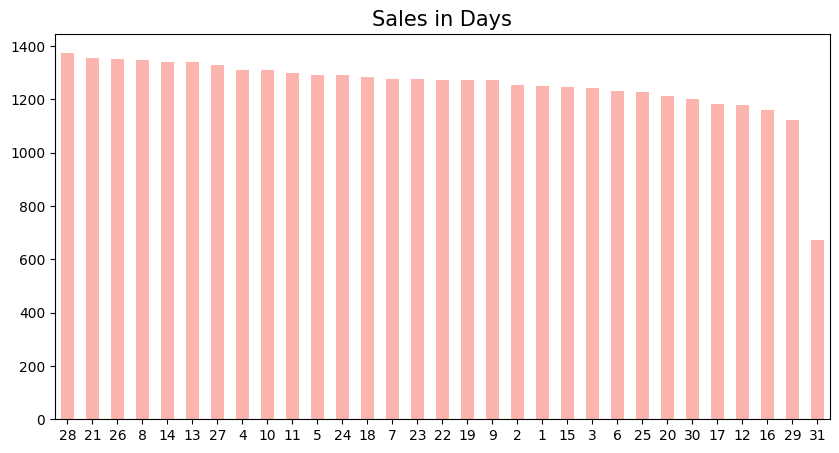

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['day'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel1')
plt.title('Sales in Days', size=15)

In [ ]:
df1 = pd.DataFrame(data_eda['itemDescription'].value_counts().head(50)).reset_index()
df1.columns =['itemDescription','Count']
df1.head()

,itemDescription,Count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


Text(0, 0.5, 'Quantity')

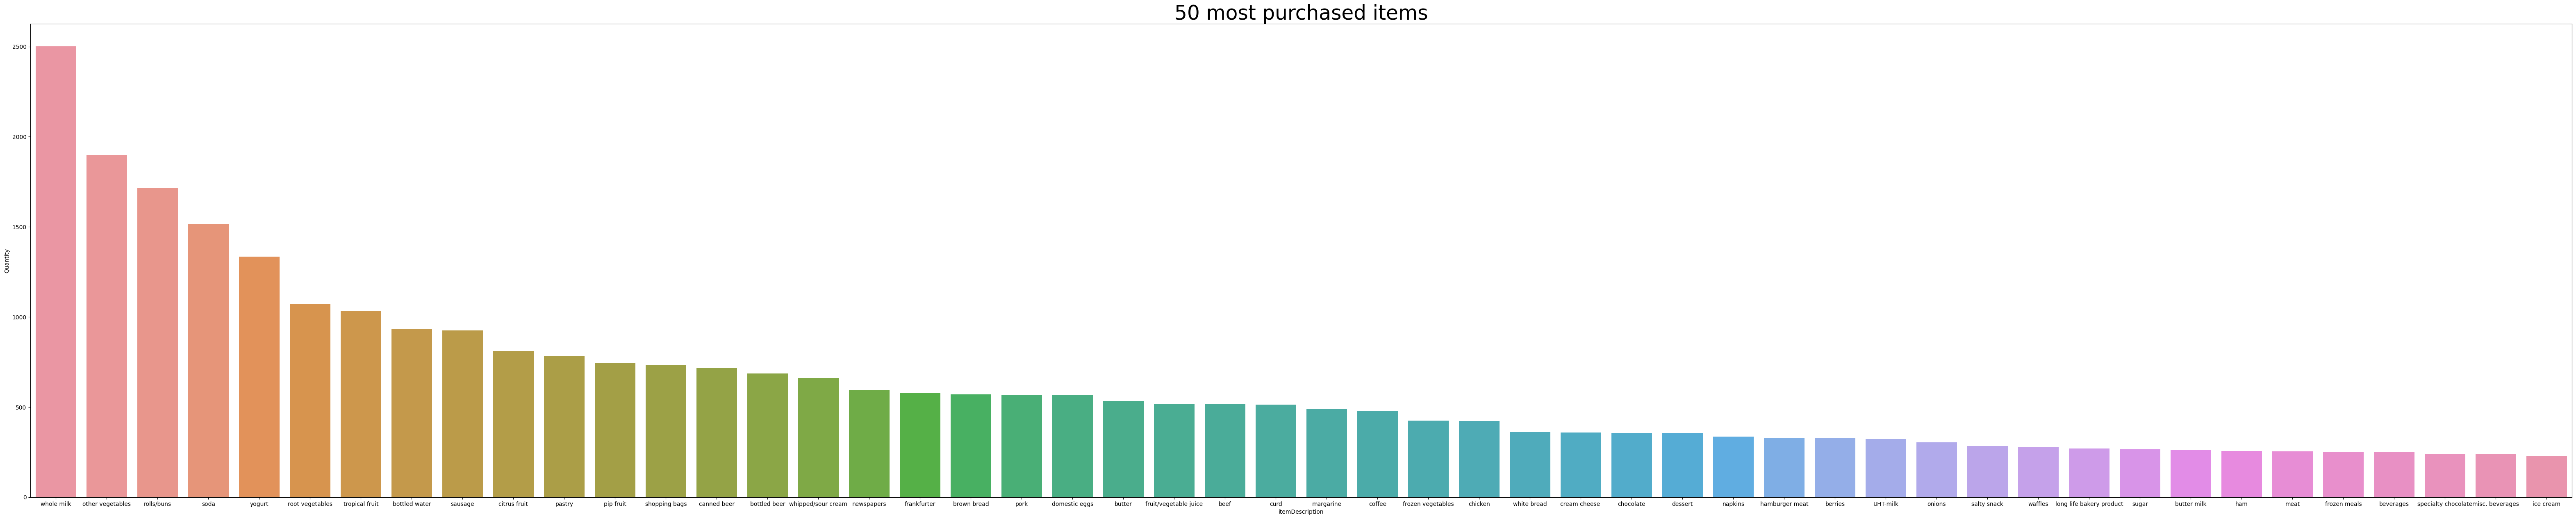

In [ ]:
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df1)
plt.title('50 most purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

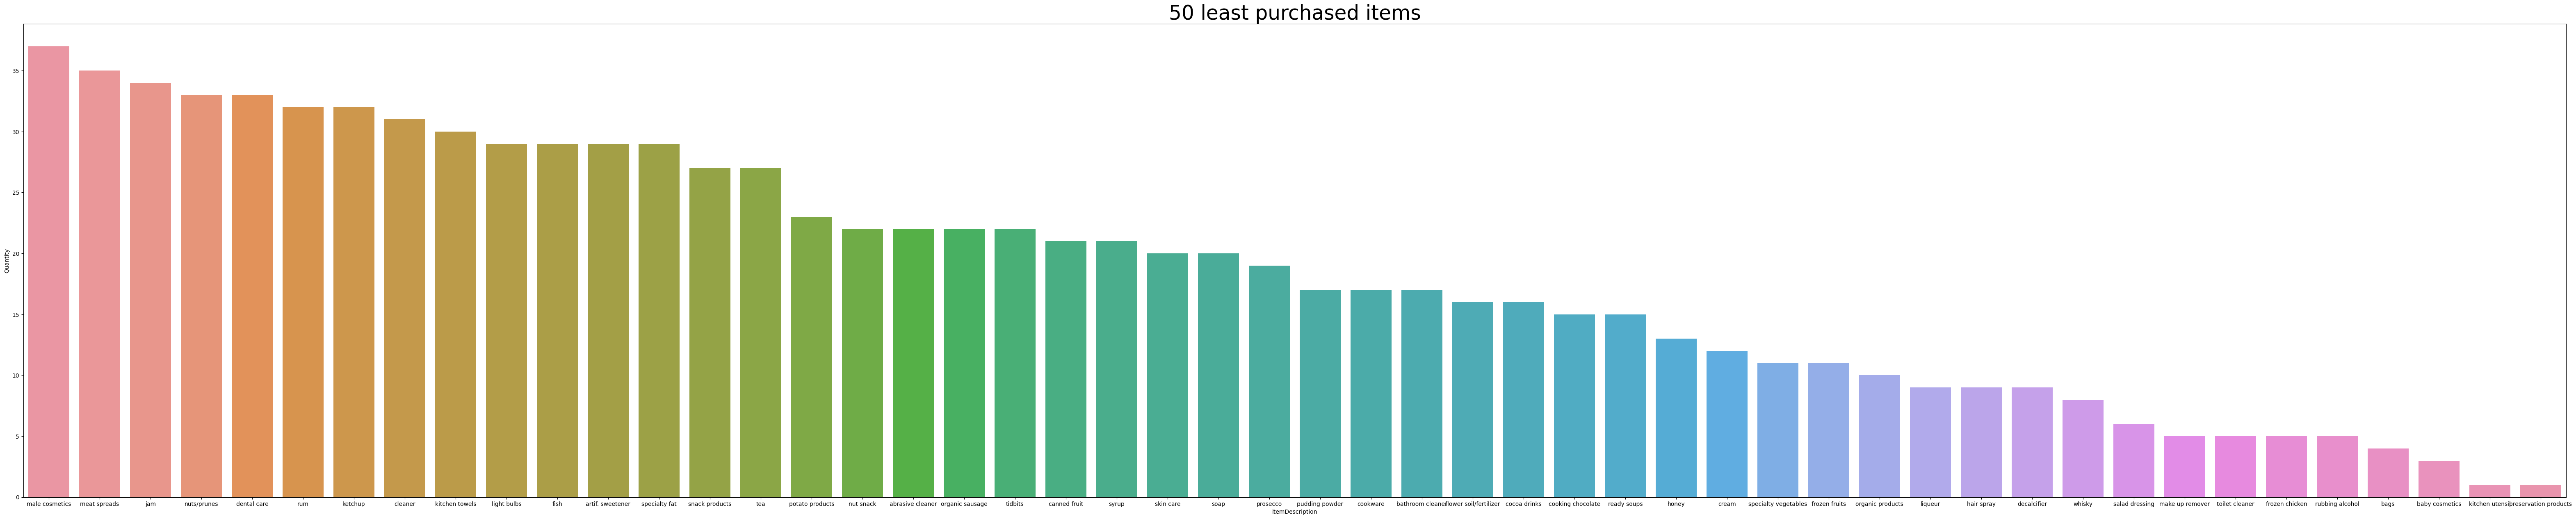

In [ ]:
df2 = pd.DataFrame(data_eda['itemDescription'].value_counts().tail(50)).reset_index()
df2.columns =['itemDescription','Count']
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df2)
plt.title('50 least purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

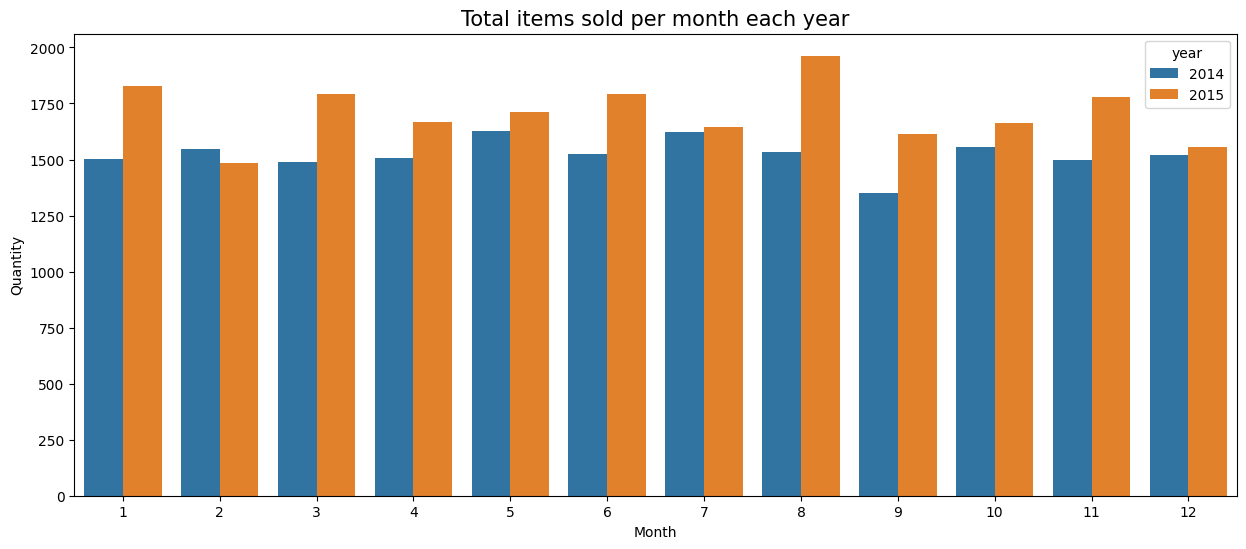

In [ ]:
#Total items sold per month each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='month', hue='year', data=data_eda)
plt.title('Total items sold per month each year', size=15)
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

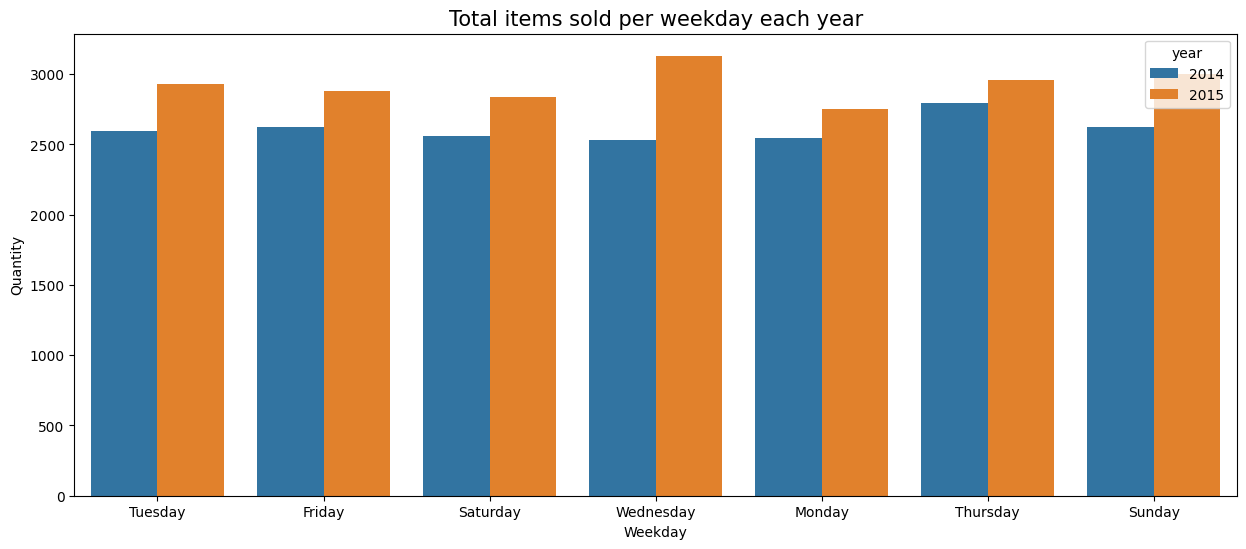

In [ ]:
#Total items sold per weekday each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='weekday', hue='year', data=data_eda)
plt.title('Total items sold per weekday each year', size=15)
plt.xlabel('Weekday')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

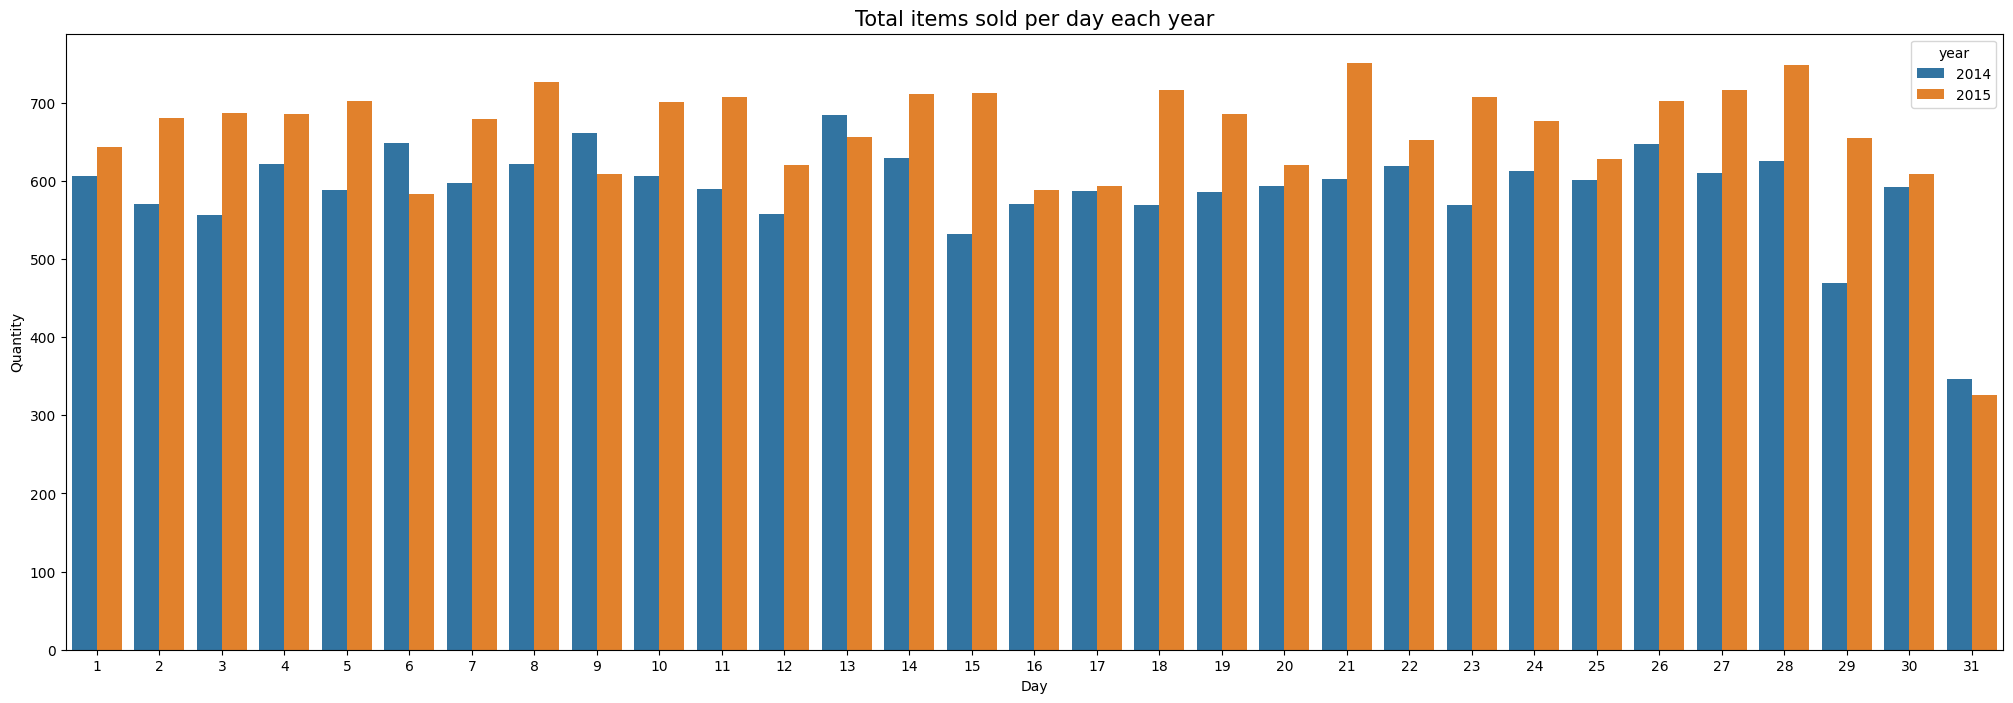

In [ ]:
#Total items sold per day each year
plt.figure(figsize=(25,8))
ax = sns.countplot(x='day', hue='year', data=data_eda)
plt.title('Total items sold per day each year', size=15)
plt.xlabel('Day')
plt.ylabel('Quantity')

In [ ]:
total_items = len(data_eda)
total_days = len(np.unique(data_eda.index.date))
total_months = len(np.unique(data_eda.index.month))
average_items = total_items / total_days
unique_items = data_eda.itemDescription.unique().size

print("Total {} items sold in {} days throughout 2 years".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))


Total 38765 items sold in 728 days throughout 2 years
With an average of 53.24862637362637 items sold daily


Text(0, 0.5, 'Quantity Purchased')

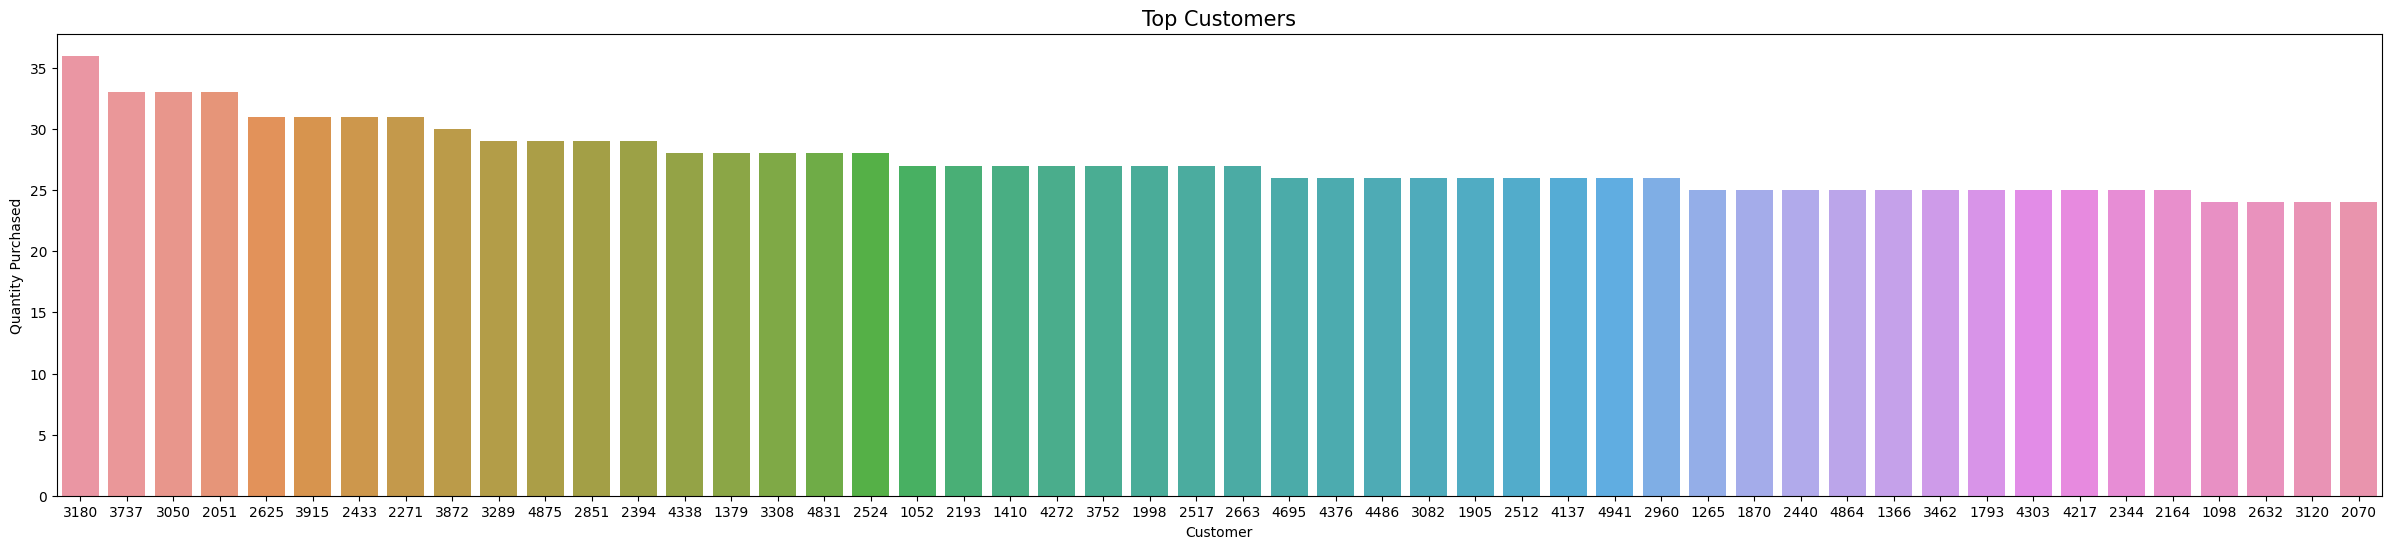

In [ ]:
#Top Customers
plt.figure(figsize=(30,6))
ax = sns.countplot(x='Member_number', data=data_eda, order=data_eda.Member_number.value_counts().iloc[:50].index)
plt.title('Top Customers', size=15)
plt.xlabel('Customer')
plt.ylabel('Quantity Purchased')

Apriori Model

In [ ]:
user_id = input()

In [ ]:
df3 = data.loc[data['Member_number'] == int(user_id)]

In [ ]:
df3

In [ ]:
df3.shape

In [ ]:
df3.values

In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Date']))]

In [ ]:
transactions

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
te.columns_

In [ ]:
te_ary

In [ ]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

In [ ]:
#Count is the total no of transactions in each colums, and freq is the no of times *TOP variable* appeared in that column
pf = transactions.describe()
pf


In [ ]:
#Count - Freq from above table - to find no of TRUE values
pf.iloc[0]-pf.iloc[3]

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False)

In [ ]:
item

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
#support = particular itemset/ total no of transactions

In [ ]:
freq_items.shape

In [ ]:
freq_items.head(10)

In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items['length'].unique()

In [ ]:
freq_items.head(100)

In [ ]:
length = freq_items.iloc[-1]['length']
length

In [ ]:
l = freq_items.loc[freq_items['length'] == length]

In [ ]:
l

In [ ]:
names=[]
for i in l.itemsets:
  for j in i:
    if j not in names:
      names.append(j)

In [ ]:
names

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)

In [ ]:
rules.shape

In [ ]:
rules.head(10)